<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/230126_Tik_Tok_Reviews_Sentiment_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link

https://thecleverprogrammer.com/2022/04/12/tiktok-reviews-sentiment-analysis-using-python/

In [2]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import io
import zipfile
from google.colab import files

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
import string
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
stemmer = nltk.SnowballStemmer('english')

In [5]:
upload = files.upload()

Saving TikTokReviewSentimentAnalysis.zip to TikTokReviewSentimentAnalysis.zip


In [6]:
z = zipfile.ZipFile(io.BytesIO(upload['TikTokReviewSentimentAnalysis.zip']))
z.namelist()[0]

'tiktok_google_play_reviews.csv'

In [7]:
data = pd.read_csv(z.open(z.namelist()[0]))
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,68ccaec8-1415-4301-a85e-3004679a3a83,Cassie Moore,https://play-lh.googleusercontent.com/a/ALm5wu...,No words,5,0,27.1.3,2022-11-29 21:55:37,NaN,NaN
1,d84cbfd3-6aa3-485c-aaf9-c5dca27dc966,Kaleb Plummer,https://play-lh.googleusercontent.com/a-/ACNPE...,Great fun app so far!,5,0,NaN,2022-11-29 21:55:04,NaN,NaN
2,96618aa1-31e5-4259-8649-89b75d962f00,Rylee Maher,https://play-lh.googleusercontent.com/a/ALm5wu...,The app would get a higher rating but I litera...,1,0,27.1.3,2022-11-29 21:54:48,NaN,NaN
3,078c0bda-598b-474e-a04e-d7cb3e6f6301,Kittykatelyn Romilly,https://play-lh.googleusercontent.com/a-/ACNPE...,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,0,NaN,2022-11-29 21:54:35,NaN,NaN
4,8e68c5cd-b12a-4206-a8da-6bfdbff44ae3,Loveness Malenga,https://play-lh.googleusercontent.com/a-/ACNPE...,Pictures and record,5,0,NaN,2022-11-29 21:54:21,NaN,NaN


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              460287 non-null  object
 1   userName              460287 non-null  object
 2   userImage             460287 non-null  object
 3   content               460271 non-null  object
 4   score                 460287 non-null  int64 
 5   thumbsUpCount         460287 non-null  int64 
 6   reviewCreatedVersion  333953 non-null  object
 7   at                    460287 non-null  object
 8   replyContent          260 non-null     object
 9   repliedAt             260 non-null     object
dtypes: int64(2), object(8)
memory usage: 35.1+ MB


In [9]:
data.isnull().sum()

reviewId                     0
userName                     0
userImage                    0
content                     16
score                        0
thumbsUpCount                0
reviewCreatedVersion    126334
at                           0
replyContent            460027
repliedAt               460027
dtype: int64

In [10]:
data = data[['content', 'score']]

In [11]:
data.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  460271 non-null  object
 1   score    460287 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [13]:
data.isnull().sum()

content    16
score       0
dtype: int64

In [14]:
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460271 entries, 0 to 460286
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  460271 non-null  object
 1   score    460271 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.5+ MB


In [16]:
stopword = set(stopwords.words('english'))

In [17]:
def clean(text):
  text = str(text).lower()
  text = re.sub(r'\[.*?\]', '', text)
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'<.*?>+', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub(r'\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ' '.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ' '.join(text)
  return text

In [18]:
data['clean_content'] = data['content'].apply(clean)

In [19]:
ratings = data['score'].value_counts()
ratings

5    338884
1     61926
4     27664
3     18618
2     13179
Name: score, dtype: int64

In [20]:
num = ratings.index
qty = ratings.values
px.pie(data_frame=data, values=qty, names=num, hole=0.5, title='Percentage of ratings give to TikTok on Google Play')

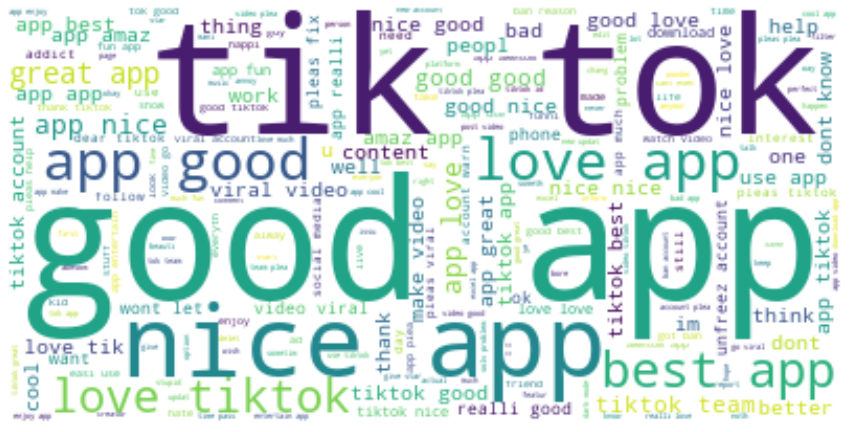

In [21]:
text = ' '.join(i for i in data['clean_content'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [23]:
sentiments = SentimentIntensityAnalyzer()

In [24]:
data['positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['clean_content']]
data['negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['clean_content']]
data['neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['clean_content']]
data['compound'] = [sentiments.polarity_scores(i)['compound'] for i in data['clean_content']]

In [25]:
data.head()

,content,score,clean_content,positive,negative,neutral,compound
0,No words,5,word,0.000,0.00,1.000,0.0000
1,Great fun app so far!,5,great fun app far,0.787,0.00,0.213,0.8126
2,The app would get a higher rating but I litera...,1,app would get higher rate liter cant sign seco...,0.000,0.07,0.930,-0.4019
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,wish could give percent rate love 💕 😘,0.633,0.00,0.367,0.7845
4,Pictures and record,5,pictur record,0.000,0.00,1.000,0.0000


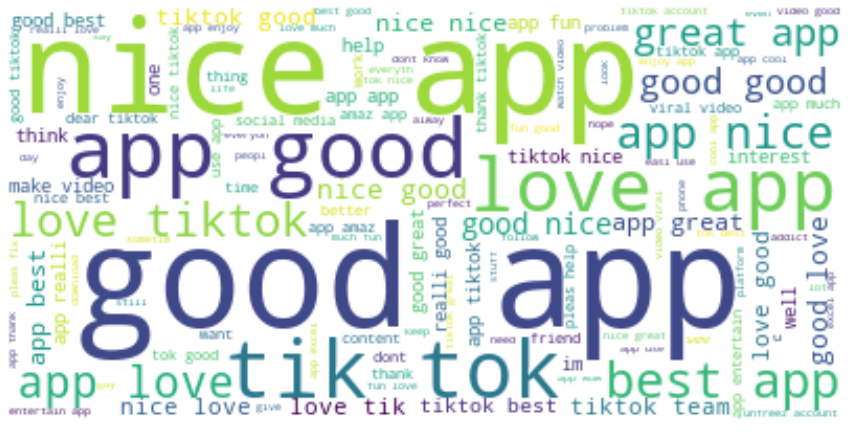

In [26]:
positive = ' '.join([i for i in data['clean_content'][data['positive']>data['negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

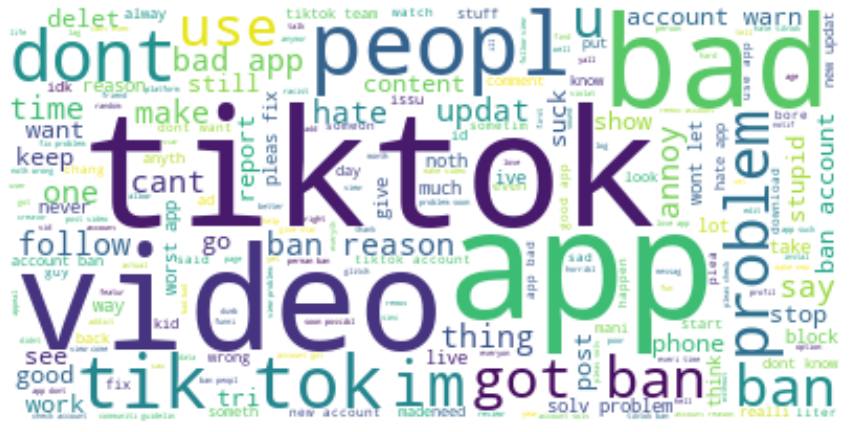

In [30]:
negative = ' '.join([i for i in data['clean_content'][data['negative']>data['positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()